In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

## Data Loading and Preparation¶

### Loading Data¶

In [4]:
uber_apr14= pd.read_csv('F:\Data Science projects\by_other\uber-pickups-in-new-york-city/uber-raw-data-apr14.csv',encoding='utf-8')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 33-36: truncated \uXXXX escape (<ipython-input-4-4e75fe9b1062>, line 1)

##### just bcz of error I m going to add r before file path to get rid of error

#### You are getting this error because you are using the path to the file as a string. Change that line to something like this:

In [5]:
files=os.listdir(r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city')[-7:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [6]:
files.remove('uber-raw-data-janjune-15.csv')

In [7]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [8]:
path=r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city'

#blank dataframe
final=pd.DataFrame()

for file in files:
    df=pd.read_csv(path+"/"+file,encoding='utf-8')
    final=pd.concat([df,final])

In [9]:
final.shape

(4534327, 4)

In [4]:

##uber_apr14 = pd.read_csv(r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city/uber-raw-data-apr14.csv',encoding='utf-8')

In [3]:
##uber_may14 = pd.read_csv(r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city/uber-raw-data-may14.csv')
##uber_jun14 = pd.read_csv(r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city/uber-raw-data-jun14.csv')
##uber_jul14 = pd.read_csv(r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city/uber-raw-data-jul14.csv')
##uber_aug14 = pd.read_csv(r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city/uber-raw-data-aug14.csv')
##uber_sep14 = pd.read_csv(r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city/uber-raw-data-sep14.csv')

In [4]:
##uber_15 = pd.read_csv(r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv',encoding='utf-8')

In [5]:
##uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [7]:
##len(uber_15)

14270479

###  Data Preparation¶

In [5]:
##df = pd.concat([uber_apr14, uber_may14, uber_jun14, uber_jul14, uber_aug14, uber_sep14])

##### Lat : The latitude of the Uber pickup

##### Lon : The longitude of the Uber pickup

##### Base : The TLC base company code affiliated with the Uber pickup

##### The globe is split into an imaginary 360 sections from both top to bottom (north to south) and 180 sections from side to side (west to east). The sections running from top to bottom on a globe are called longitude, and the sections running from side to side on a globe are called latitude.


##### Latitude is the measurement of distance north or south of the Equator.

##### Every location on earth has a global address. Because the address is in numbers, people can communicate about location no matter what language they might speak. A global address is given as two numbers called coordinates. The two numbers are a location's latitude number and its longitude number ("Lat/Long").

In [10]:
df=final.copy()

In [11]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [29]:
df.shape

(4534327, 4)

In [30]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [12]:
## takes 1 min 
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

##### Either u can create ur own custom function to fetch derived attributes or use date time in-built methods

In [33]:
'''def weekday(x):
    return x.day_name()'''

In [34]:
'''def day(x):
    return x.day'''

In [35]:
'''def minute(x):
    return x.minute'''

In [36]:
'''def month(x):
    return x.month'''

In [37]:
'''def hour(x):
    return x.hour'''

In [38]:
### takes approx more than 5 mins
'''df['weekday']=df['Date/Time'].apply(weekday)
df['day']=df['Date/Time'].apply(day)
df['minute']=df['Date/Time'].apply(minute)
df['month']=df['Date/Time'].apply(month)
df['hour']=df['Date/Time'].apply(hour)'''

In [13]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [14]:

df['weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

In [15]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

In [16]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [12]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [13]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [14]:
df['weekday'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

#### Analysis of journey by Week-days

In [43]:
import plotly.express as px

In [ ]:
px.bar(x=df['weekday'].value_counts().index,
      y=df['weekday'].value_counts().values
      )

#### seems to have highest sales on Thursday

In [ ]:
### using countplot as well ''' sns.countplot(df['weekday']) '''

### Analysis by Hour

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

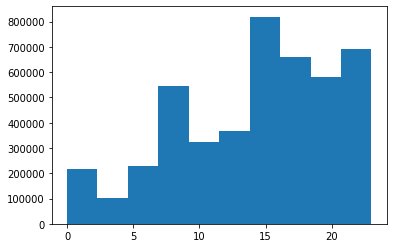

In [17]:
plt.hist(df['hour'])

#### It peaks during evening time when people are logging off from work

In [18]:
for i,month in enumerate(df['month'].unique()):
    print(month)

9
5
6
7
8
4


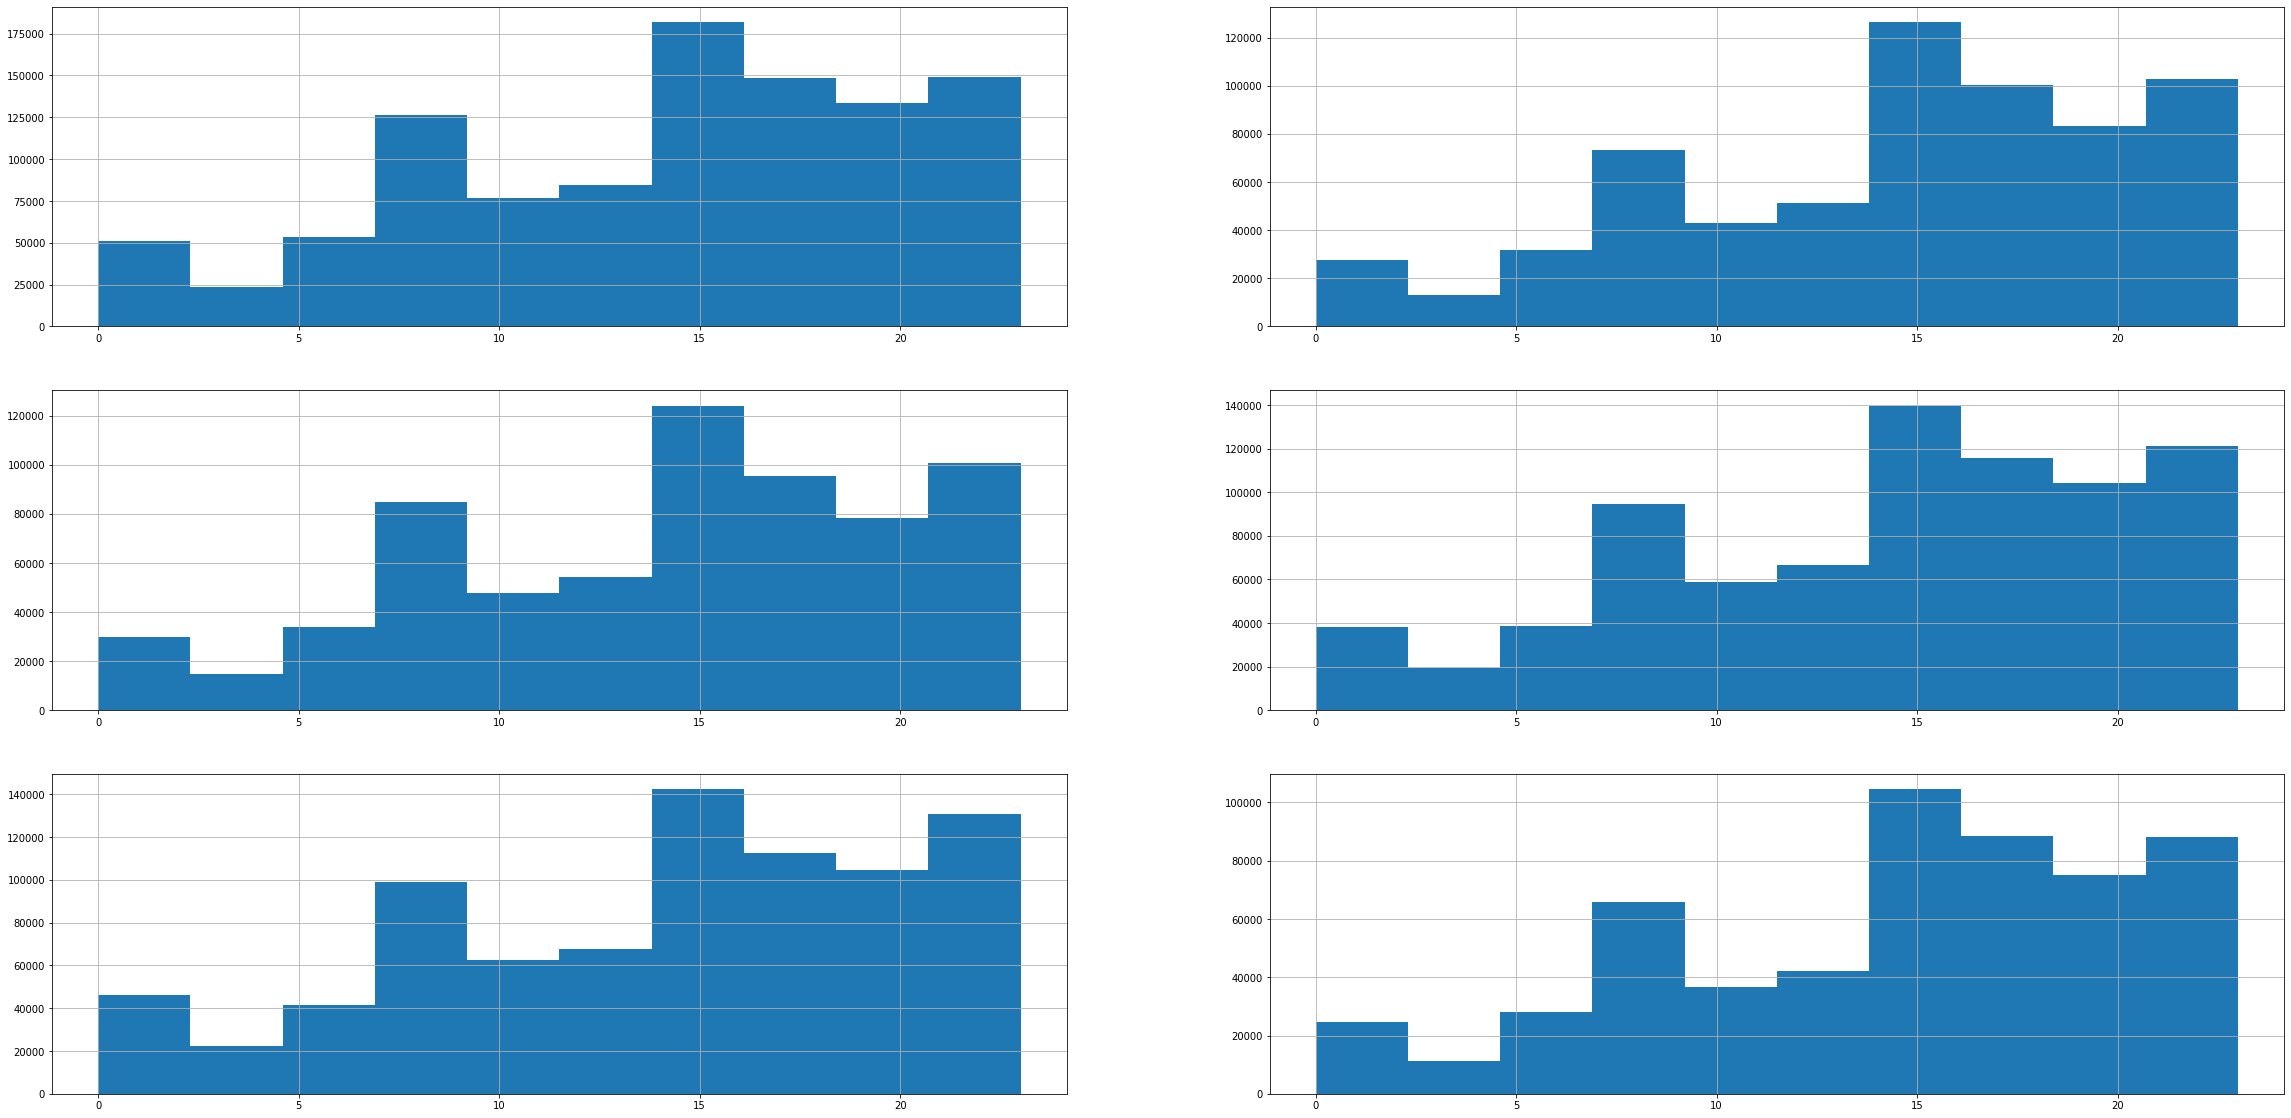

In [19]:

plt.figure(figsize=(40,20))
for i,month in enumerate(df['month'].unique()):
    plt.subplot(3,2,i+1)
    df[df['month']==month]['hour'].hist()


#### Analysis of Rush of each hour in each month

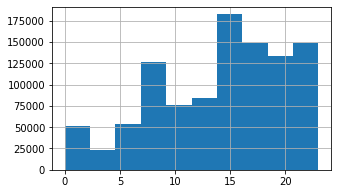

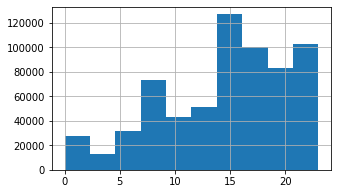

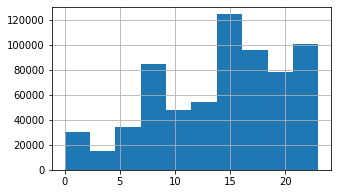

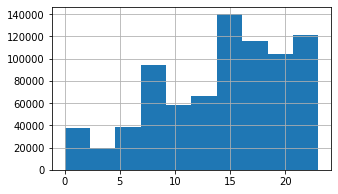

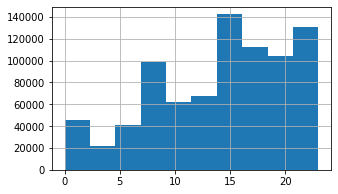

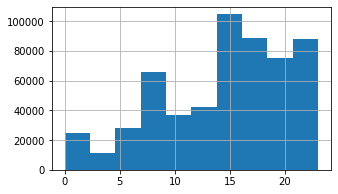

In [20]:
for i in df['month'].unique():
    plt.figure(figsize=(5,3))
    df[df['month']==i]['hour'].hist()
    

#### analysis of which month has max rides

In [71]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
trace1 = go.Bar( 
        x = df.groupby('month')['hour'].sum().index,
        y = df.groupby('month')['hour'].sum(),
        name= 'Priority')
iplot([trace1])

In [ ]:
## using Matplotlib
''' 
df.groupby('month')['hour'].sum().plot(kind='bar')
plt.xticks(range(6), 'Apr May June July Aug Sep Oct'.split())
plt.ylabel('Total trips')
'''

#### Analysis of Journey of Each  Day

Text(0.5, 1.0, 'Journeys by Month Day')

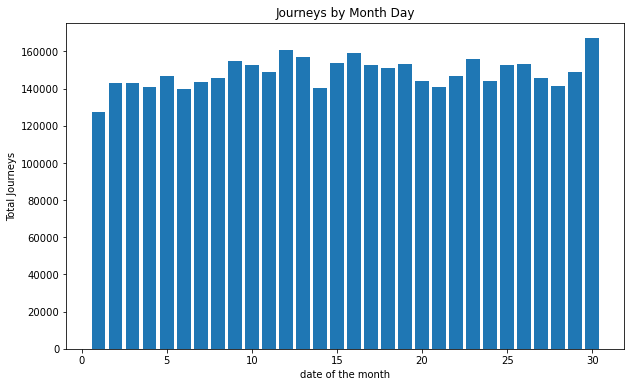

In [18]:
plt.figure(figsize=(10,6))
plt.hist(df['day'], bins=30, rwidth=.8, range=(0.5, 30.5))
plt.xlabel('date of the month')
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day')

#### Analysis of Total rides month wise

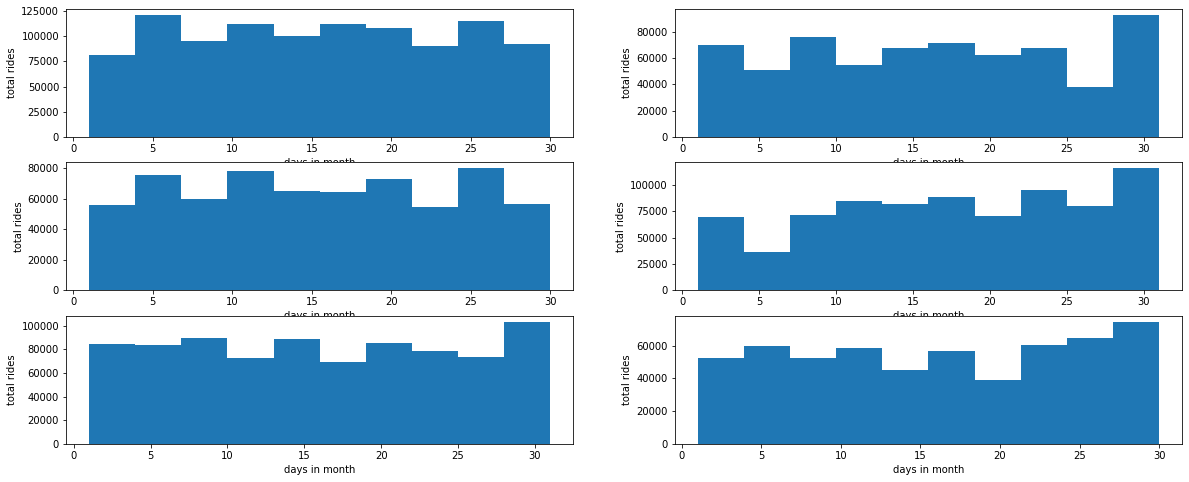

In [23]:
plt.figure(figsize=(20,8))
for i,month in enumerate(df['month'].unique(),1):
    plt.subplot(3,2,i)
    df_out=df[df['month']==month]
    plt.hist(df_out['day'])
    plt.xlabel('days in month'.format(i))
    plt.ylabel('total rides')

### getting Rush in hour 

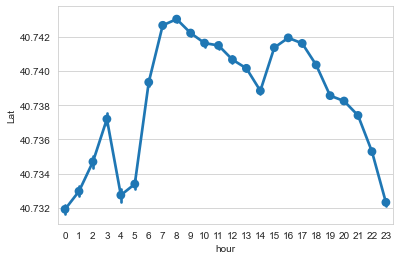

In [12]:
sns.set_style(style='whitegrid')
sns.pointplot(x="hour",y="Lat",data=lat_df)

##### adding hue params

Text(0.5, 1.0, 'hoursoffday vs latiitide of passenger')

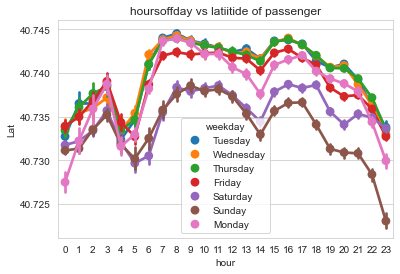

In [52]:
ax=sns.pointplot(x="hour",y="Lat", hue="weekday",data=df)
ax.set_title('hoursoffday vs latiitide of passenger')

#### to analyse which base number gets popular by month name

In [35]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0


In [36]:
df['Base'].head()

0    B02512
1    B02512
2    B02512
3    B02512
4    B02512
Name: Base, dtype: object

In [39]:
df.groupby(['Base','month'])['Date/Time'].count()

Base    month
B02512  4         35536
        5         36765
        6         32509
        7         35021
        8         31472
        9         34370
B02598  4        183263
        5        260549
        6        242975
        7        245597
        8        220129
        9        240600
B02617  4        108001
        5        122734
        6        184460
        7        310160
        8        355803
        9        377695
B02682  4        227808
        5        222883
        6        194926
        7        196754
        8        173280
        9        197138
B02764  4          9908
        5          9504
        6          8974
        7          8589
        8         48591
        9        178333
Name: Date/Time, dtype: int64

In [42]:
base=df.groupby(['Base','month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


#### to analyse which base number gets popular by month name

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month',y='Date/Time',hue='Base',data=base)

#### 2 Cross Analysis
#### Through our exploration we are going to visualize:


#### 1.Heatmap by Hour and Weekday.
#### 2.Heatmap by Hour and Day.
#### 3.Heatmap by Month and Day.
#### 4.Heatmap by Month and Weekday.

## Heatmap by Hour and Weekday.

#### create pivot_tables

##### simplest way of creating pivot tables,first of all call groupby on 2 columns so that we will get groups 
##### df.groupby(['weekday','hour']).apply(lambda x: len(x)), now "weekday" becomes rows and "hour" becomes cols
##### & then call unstack

In [9]:
def count_rows(rows):
    return len(rows)

In [10]:
by_cross = df.groupby(['weekday','hour']).apply(count_rows)
by_cross

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [11]:
pivot=by_cross.unstack()
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


##### creating heatmap so that it can be easily visualize

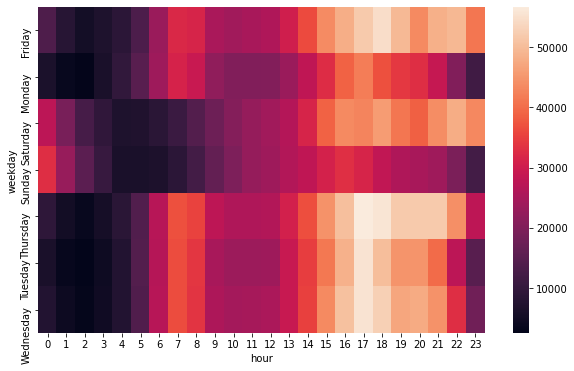

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=False)

In [13]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0


In [20]:
def heatmap(col1,col2):
    by_cross = df.groupby([col1,col2]).apply(lambda x:len(x))
    pivot=by_cross.unstack()
    plt.figure(figsize=(10,6))
    return sns.heatmap(pivot,annot=False)

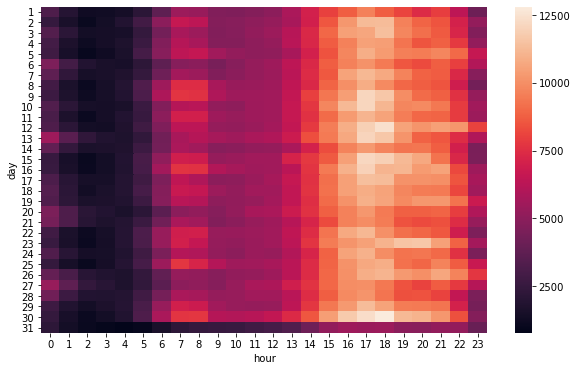

In [21]:
## validating above Analysis through Heatmap
heatmap('day','hour')

In [ ]:
heatmap('day','month')

#### Analysing the results
#### We observe that the number of trips increases each month, we can say that from April to September 2014, Uber was in a continuous improvement process.

In [26]:
df[df['month']==4]

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30,22,4,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30,26,4,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30,31,4,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30,32,4,23


In [ ]:
heatmap('weekday','month')

#### Analysis of Location data points¶

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(df['Lon'], df['Lat'],'r+', ms=0.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6,41)

##### We can see a number of hot spots here. Midtown Manhattan is clearly a huge bright spot.
##### & these are made from Midtown to Lower Manhattan.
##### Followed by Upper Manhattan and the Heights of Brooklyn.


### perform Spatial Analysis using heatmap to get a clear cut of Rush on Sunday(Weekend)

In [19]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0


In [87]:
df_out=df[df['weekday']=='Sunday']
df_out.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
8011,2014-09-07 00:00:00,40.7341,-74.0005,B02512,Sunday,7,0,9,0
8012,2014-09-07 00:00:00,40.7344,-73.9900,B02512,Sunday,7,0,9,0
8013,2014-09-07 00:00:00,40.7806,-73.9582,B02512,Sunday,7,0,9,0
8014,2014-09-07 00:01:00,40.7293,-73.9859,B02512,Sunday,7,1,9,0
8015,2014-09-07 00:01:00,40.7713,-74.0133,B02512,Sunday,7,1,9,0


In [89]:
df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index()

,Lat,Lon,weekday
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


In [90]:
from folium.plugins import HeatMap

In [91]:
import folium
from folium.plugins import HeatMap
basemap=folium.Map()

In [ ]:
HeatMap(df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index(),zoom=20,radius=15).add_to(basemap)
basemap

##### Lets create a function for a specific day

In [95]:
def plot(df,day):
    df_out=df[df['weekday']==day]
    df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index()
    HeatMap(df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index(),zoom=20,radius=15).add_to(basemap)
    return basemap


In [ ]:
plot(df,'Sunday')

## Analysis of Jan-June uber_15

In [97]:
uber_15 = pd.read_csv(r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv',encoding='utf-8')
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [98]:
uber_15.shape

(14270479, 4)

In [99]:
#Checking the minimum date in the uber_15
uber_15['Pickup_date'].min()

'2015-01-01 00:00:05'

In [100]:
#Checking the maximum date in the uber_15
uber_15['Pickup_date'].max()

'2015-06-30 23:59:00'

In [101]:
uber_15['Pickup_date'] =  pd.to_datetime(uber_15['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [102]:

uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['minute']=uber_15['Pickup_date'].dt.minute
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['hour']=uber_15['Pickup_date'].dt.hour

In [103]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,weekday,day,minute,month,hour
0,B02617,2015-05-17 09:47:00,B02617,141,Sunday,17,47,5,9
1,B02617,2015-05-17 09:47:00,B02617,65,Sunday,17,47,5,9
2,B02617,2015-05-17 09:47:00,B02617,100,Sunday,17,47,5,9
3,B02617,2015-05-17 09:47:00,B02774,80,Sunday,17,47,5,9
4,B02617,2015-05-17 09:47:00,B02617,90,Sunday,17,47,5,9


##### Uber pickups by the month in NYC

In [ ]:
px.bar(x=uber_15['month'].value_counts().index,
           y=uber_15['month'].value_counts().values)

#### We can see that the number of Uber pickup has been steadily increasing throughout the first half of 2015 in NYC

In [18]:
### using matplotlib
'''import matplotlib.ticker as tick
ax=sns.countplot(uber_15['month'])
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.0f'))'''

#### Analysing Rush in New york City

In [ ]:
ax=sns.countplot(uber_15['hour'])
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.0f'))

##### Interestingly, after the morning rush, the number of Uber pickups doesn't dip much throughout the rest of the morning and early afternoon. There is significantly more demand in the evening than the daytime. Let's investigate to see if there's a difference in hourly pattern for different days of the week.

### Analysing In-Depth Analysis of Rush in New york City Day & hour wise

##### group the data by Weekday and hour

In [114]:
uber_15.groupby(['weekday', 'hour'])['Pickup_date'].count()

weekday    hour
Friday     0        85939
           1        46616
           2        28102
           3        19518
           4        23575
                    ...  
Wednesday  19      143751
           20      136003
           21      133993
           22      127026
           23       99490
Name: Pickup_date, Length: 168, dtype: int64

In [115]:
uber_15.groupby(['weekday', 'hour'])['Pickup_date'].count().reset_index()

,weekday,hour,Pickup_date
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


In [116]:
summary=uber_15.groupby(['weekday', 'hour'])['Pickup_date'].count().reset_index()

In [117]:
summary=summary.rename(columns = {'Pickup_date':'Counts'})
summary

,weekday,hour,Counts
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


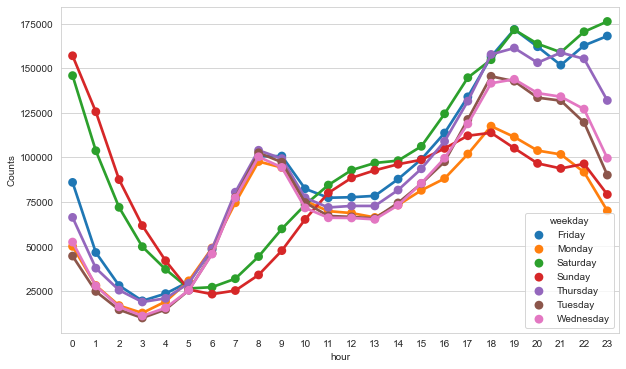

In [51]:
plt.figure(figsize=(10,6))
sns.pointplot(x="hour", y="Counts", hue="weekday", data=summary)

##### Loading Uber-Jan-Feb-FOIL.csv

In [118]:
uber_foil=pd.read_csv(r'F:\Data Science projects\by_other\uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv')

In [119]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [120]:
uber_foil['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

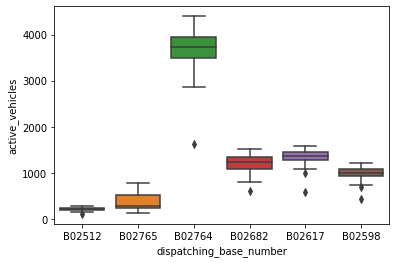

In [121]:
sns.boxplot(x = 'dispatching_base_number', y = 'active_vehicles', data = uber_foil)

#### seems to have more number of Active Vehicles in B02764

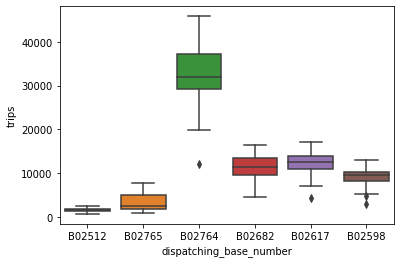

In [122]:
sns.boxplot(x = 'dispatching_base_number', y = 'trips', data = uber_foil)

#### seems to have more number of trips in B02764

In [123]:
# Finding the ratio of trips/active_vehicles
uber_foil['trips/vehicle'] = uber_foil['trips']/uber_foil['active_vehicles']

In [124]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips,trips/vehicle
0,B02512,1/1/2015,190,1132,5.957895
1,B02765,1/1/2015,225,1765,7.844444
2,B02764,1/1/2015,3427,29421,8.585060
3,B02682,1/1/2015,945,7679,8.125926
4,B02617,1/1/2015,1228,9537,7.766287


In [125]:
uber_foil.set_index('date')

,dispatching_base_number,active_vehicles,trips,trips/vehicle
date,,,,
1/1/2015,B02512,190,1132,5.957895
1/1/2015,B02765,225,1765,7.844444
1/1/2015,B02764,3427,29421,8.585060
1/1/2015,B02682,945,7679,8.125926
1/1/2015,B02617,1228,9537,7.766287
...,...,...,...,...
2/28/2015,B02764,3952,39812,10.073887
2/28/2015,B02617,1372,14022,10.220117
2/28/2015,B02682,1386,14472,10.441558


##### how Average trips/vehicle inc/decreases with dates with each of base umber

In [ ]:
plt.figure(figsize=(10,6))
uber_foil.set_index('date').groupby(['dispatching_base_number'])['trips/vehicle'].plot()
plt.ylabel('Average trips/vehicle')
plt.title('Demand vs Supply chart (Date-wise)')
plt.legend()